### The aim of this project is to predict whether a patient has diabetes or not based on provided data. Also find the best  fit model of high Precision and Accuracy.


# Import the required Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Week 1 Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values.
On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) 
plot describing the data types and the count of variables.

In [3]:
health_care_df=pd.read_csv("health care diabetes.csv")

In [4]:
health_care_train=pd.read_csv("health_care_train.csv")

In [5]:
health_care_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
type(health_care_df) 

pandas.core.frame.DataFrame

# Here I am using the pandas profiling technique to understand and analysis of the variables and their respective values.


In [7]:
#Here I am using pandas profiling because it is very useful to generate report by executing few lines of codes.
# The overview section generated by report of pandas profiling provides important statistical information 
# about the data used.
# Number of variables (Categorical,Numerical,Int,float,Object,etc).
# Number of observation. 
# Missing Values and Missing Values %.
# Duplicates Row and Duplicate Row %.
# Size of data 
# The warning tab generate by the pandas profiling inform about the cardinality (High,Low),Correlation(high,low).
# Of the dataset, it provides the information of the variables according to its type.


In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(health_care_df)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# From the pandas profiling report, we can draw the following information.
# pregnacies has 111 (14.5%) zero values. 
# Blood pressure has 35 (4.6%) zero values.
# skinthickness has 227 (29.6% )zero values .
# Insulin has 374 (48.7%) zero values.
# BMI has 11 (1.4%) zero values.


# Week 2 Data Exploration:
.Check the balance of the data by plotting the count of outcomes by their value. Describe your  findings and plan future course of action.

.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

.Perform correlation analysis. Visually explore it using a heat map.

In [11]:
positive=health_care_df[health_care_df['Outcome']==1] # Here I am taking only the outcome with the value=1
positive.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1

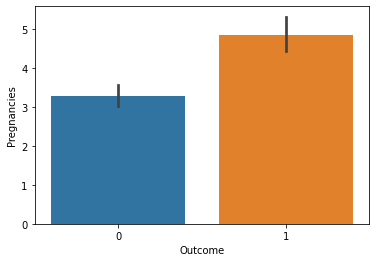

In [12]:
sns.barplot(health_care_df.Outcome,health_care_df.Pregnancies)

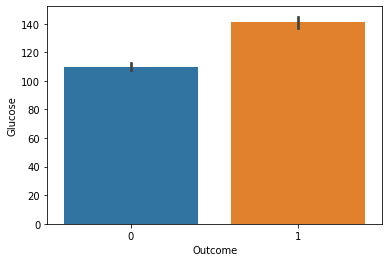

In [13]:
sns.barplot(health_care_df.Outcome,health_care_df.Glucose)

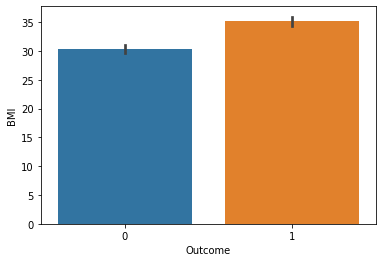

In [14]:
sns.barplot(health_care_df.Outcome,health_care_df.BMI)

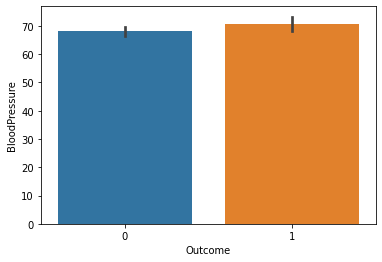

In [15]:
sns.barplot(health_care_df.Outcome,health_care_df.BloodPressure)

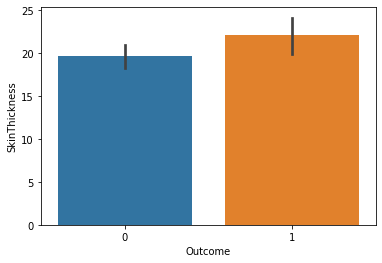

In [16]:
sns.barplot(health_care_df.Outcome,health_care_df.SkinThickness)

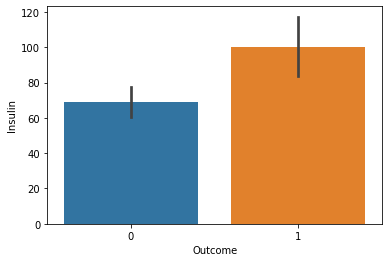

In [17]:
sns.barplot(health_care_df.Outcome,health_care_df.Insulin)

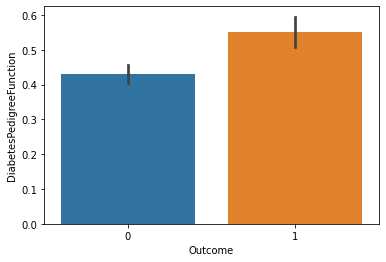

In [18]:
sns.barplot(health_care_df.Outcome,health_care_df.DiabetesPedigreeFunction)

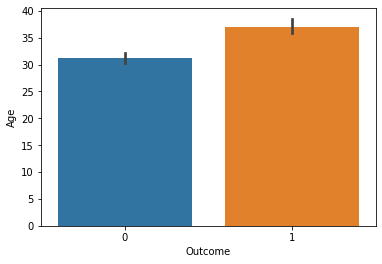

In [19]:
sns.barplot(health_care_df.Outcome,health_care_df.Age)


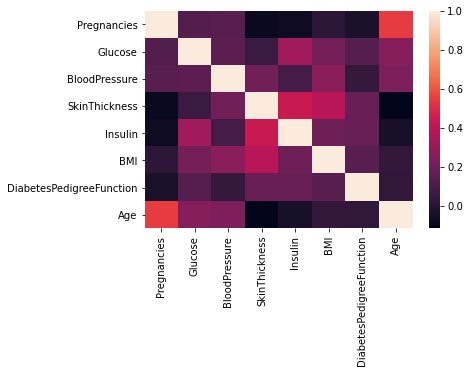

In [20]:
#Checking the Correlation between variables 
corr_feature=health_care_df.drop('Outcome',axis=1)
sns.heatmap(corr_feature.corr())



In [21]:
# From the above observation it is found that glucose and Insulin are 
# amongst the most correlated variable.

# Scatter Plot 

In [22]:
BloodPressure=positive['BloodPressure']
Glucose=positive['Glucose']
SkinThickness=positive['SkinThickness']
Insulin=positive['Insulin']
BMI=positive['BMI']
Age=positive['Age']

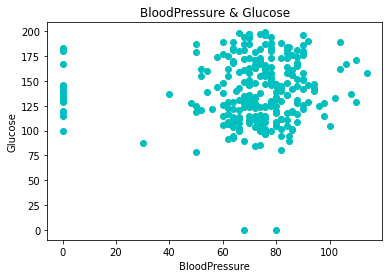

In [23]:
plt.scatter(BloodPressure,Glucose,color=['c'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose' )
plt.show()

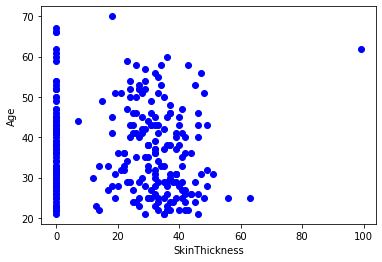

In [24]:
plt.scatter (SkinThickness,Age,color=['blue'])
plt.xlabel('SkinThickness')
plt.ylabel('Age')
plt.show()

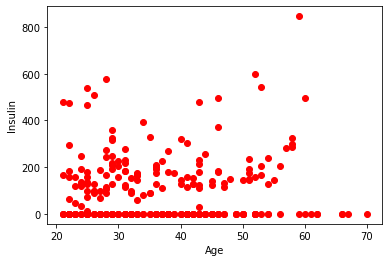

In [25]:
plt.scatter(Age,Insulin,color=['red'])
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.show()

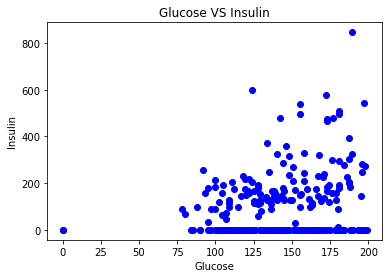

In [26]:
plt.scatter(Glucose,Insulin,color=['blue'])#,data=health_care_df)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Glucose VS Insulin')
plt.show()

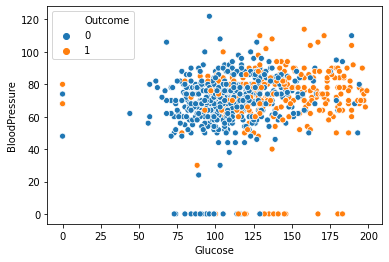

In [27]:
G=sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',
                 data=health_care_df);

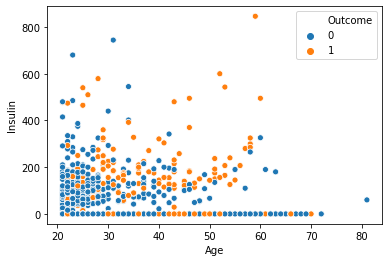

In [28]:
B=sns.scatterplot(x="Age",y="Insulin",hue="Outcome",data=health_care_df);

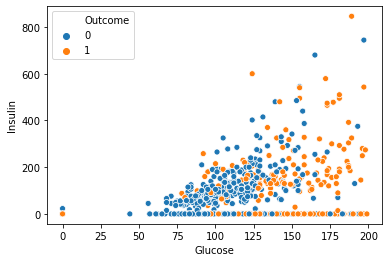

In [29]:
I=sns.scatterplot(x="Glucose",y="Insulin",hue="Outcome",
                 data=health_care_df);

# Correlation Matrix

In [30]:
health_care_df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

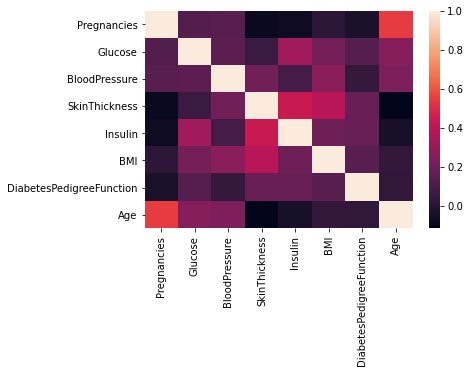

In [31]:
corr_feature=health_care_df.drop('Outcome',axis=1)
sns.heatmap(corr_feature.corr())

Create Heat Map of Correlation Matrix

Correlation Values 

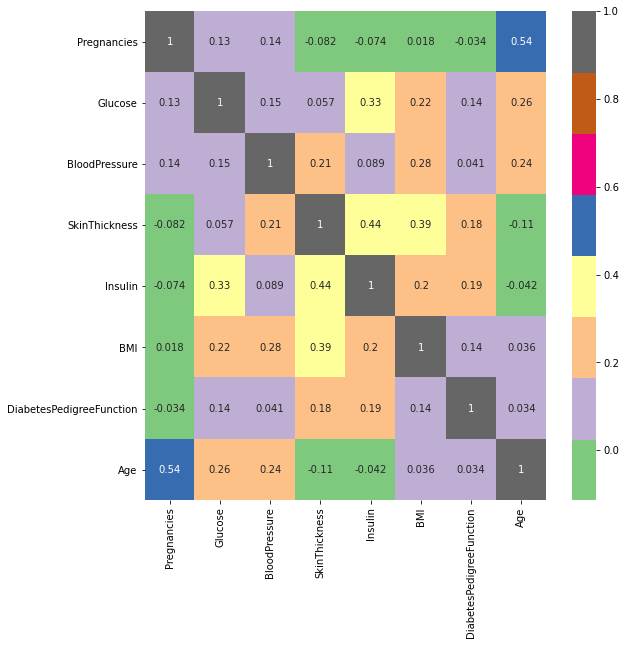

In [32]:
plt.subplots(figsize=(9,9))
sns.heatmap(corr_feature.corr(),annot=True,cmap='Accent')

# Logistic Regression and Model Building 

In [33]:
health_care_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [34]:
features=health_care_df.iloc[:,[0,1,2,3,4,5,6,7]].values # selecting feature variables
label=health_care_df.iloc[:,8].values # Selecting target or label

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
features,label=oversample.fit_resample(features,label)

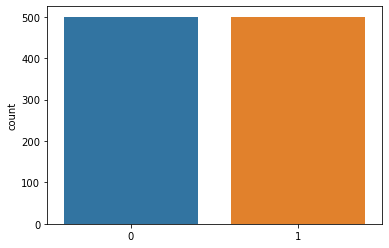

In [36]:
# checking the distribution of data after applying oversampling 
sns.countplot(label)

In [37]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(features,label,test_size=0.2,random_state=10)

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [39]:
# Create the model 
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train_ss,y_train)
y_model_lr_train_pred=model_lr.predict(X_train_ss)
y_model_lr_test_pred=model_lr.predict(X_test_ss)


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
print('The accuaracy score of train dataset is:',accuracy_score(y_model_lr_train_pred,y_train))
print('The accuarcy score of test dataset is:',accuracy_score(y_model_lr_test_pred,y_test))

The accuaracy score of train dataset is: 0.75875
The accuarcy score of test dataset is: 0.75


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_model_lr_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.74      0.78      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [43]:
confusion_matrix(y_model_lr_test_pred,y_test)

array([[71, 28],
       [22, 79]])

In [44]:
# applying K-fold cross validation 
# Here I want to check the accuracy of the model whether it is 
# overfitting or underfitting and letting to know the quality of the 
# the model hence help to decide the model selection.
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
k=5
kf=KFold(n_splits=k,random_state=None)
model=model_lr
result=cross_val_score(model_lr,features,label)

In [45]:
print('Accuracy of each fold are:',result)
print('Average accuracy is:',np.round(result.mean(),decimals=2))

Accuracy of each fold are: [0.74 0.73 0.77 0.77 0.76]
Average accuracy is: 0.75


In [46]:
from sklearn.neighbors import KNeighborsClassifier
Ist=[]
for i in range(1,30,2):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_ss,y_train)
    #y_model_knn_train_pred=model_knn.predict(X_train)
    y_model_knn_test_pred=model_knn.predict(X_test_ss)
    Ist.append(np.mean(y_model_knn_test_pred !=y_test))

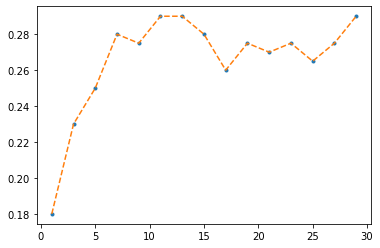

In [47]:
plt.plot(range(1,30,2),Ist,'.')
plt.plot(range(1,30,2),Ist,'--')

In [48]:
model_knn_1=KNeighborsClassifier(n_neighbors=1)
model_knn_1.fit(X_train_ss,y_train)
y_model_knn_train_pred_1=model_knn_1.predict(X_train_ss)
y_model_knn_test_pred_1=model_knn_1.predict(X_test_ss)

In [49]:
print('The accuarcy score of train dataset is:',accuracy_score(y_model_knn_train_pred_1,y_train))
print('The accuracy score of test dataset is:',accuracy_score(y_model_knn_test_pred_1,y_test))

The accuarcy score of train dataset is: 1.0
The accuracy score of test dataset is: 0.82


In [50]:
confusion_matrix(y_model_knn_test_pred_1,y_test)

array([[70, 13],
       [23, 94]])

In [51]:
from sklearn.model_selection import cross_val_score,KFold
k=5
kf=KFold(n_splits=5,random_state=None)
model=model_knn_1
result_knn=cross_val_score(model,features,label)

In [52]:
print('Accuracy of each fold are:',result_knn)
print('Average accuracy is:',np.round(result_knn.mean(),decimals=2))

Accuracy of each fold are: [0.765 0.765 0.78  0.87  0.845]
Average accuracy is: 0.8


In [53]:
from xgboost import XGBClassifier 
model_xgb=XGBClassifier()
model_xgb.fit(X_train_ss,y_train)
y_model_xgb_train_pred_1=model_xgb.predict(X_train_ss)
y_model_xgb_test_pred_1=model_xgb.predict(X_test_ss)

[16:09:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
print('The accuracy score of train dataset is:',accuracy_score(y_model_xgb_train_pred_1,y_train))
print('The accuracy score of the test dataset is:',accuracy_score(y_model_xgb_test_pred_1,y_test))

The accuracy score of train dataset is: 1.0
The accuracy score of the test dataset is: 0.825


In [55]:
from sklearn.tree import DecisionTreeClassifier 
model_dtc=DecisionTreeClassifier()
model_dtc.fit(X_train_ss,y_train)
y_model_dtc_train_pred_1=model_dtc.predict(X_train_ss)
y_model_dtc_test_pred_1=model_dtc.predict(X_test_ss)

In [56]:
print('The accuarcy score of train dataset is:',accuracy_score(y_model_dtc_train_pred_1,y_train))
print('The accuarcy score of test dataset is: ',accuracy_score(y_model_dtc_test_pred_1,y_test))

The accuarcy score of train dataset is: 1.0
The accuarcy score of test dataset is:  0.79


In [57]:
confusion_matrix(y_model_dtc_test_pred_1,y_test)

array([[69, 18],
       [24, 89]])

In [58]:
from sklearn.ensemble import RandomForestClassifier 
model_rf=RandomForestClassifier()
model_rf.fit(X_train_ss,y_train)
y_model_rf_train_pred_1=model_rf.predict(X_train_ss)
y_model_rf_test_pred_1=model_rf.predict(X_test_ss)

In [59]:
print('The accuracy score of train dataset is:',accuracy_score(y_model_rf_train_pred_1,y_train))
print('The accuracy score of test dataset is:',accuracy_score(y_model_rf_test_pred_1,y_test))

The accuracy score of train dataset is: 1.0
The accuracy score of test dataset is: 0.835


In [60]:
k=5
kf_rf=KFold()
result_rf=cross_val_score(model_rf,features,label)

In [61]:
print('Accuracy of each fold are:',result_rf)
print('Average accuracy is:',np.round(result_rf.mean(),decimals=2))

Accuracy of each fold are: [0.855 0.79  0.875 0.945 0.895]
Average accuracy is: 0.87


In [62]:
print(classification_report(y_model_rf_test_pred_1,y_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        88
           1       0.87      0.83      0.85       112

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



In [64]:
# ROC and AUC curve
# Now, here I wanted to check the model overall accuracy interms of true postive rate (TPR) and false positive rate (FPR)
# that helpst to predict the overall accuracy of the model and how good it is. In general, ROC curve represents graph between
# x-axis as 1-specificity and y-axis as sensitivity with a cutoff value. Each point in ROC curve represnts fraction of true 
# positve and false posive. Hence, if the accuracy score is above 0.8 the model is good but still some false postive exists which
# is very important in a clinical test. Therefore, given the sensitivity of the data there is trade-off between TPR and FPR. In this case where
# The area under the ROC curve represents the goodness of the model and a good model covers most fraction of that area.

In [65]:
from sklearn.metrics import roc_auc_score,roc_curve
rf_probs=model_rf.predict_proba(X_test_ss)
knn_probs=model_knn_1.predict_proba(X_test_ss)

In [66]:
#rf_fpr =roc_curve(y_test,rf_probs[:,1]
#rf_tpr =roc_curve(y_test,rf_probs[:,1])
rf_fpr,rf_tpr,thresholds=roc_curve(y_test,rf_probs[:,1])
knn_fpr,knn_tpr,thresholds=roc_curve(y_test,knn_probs[:,1])



In [67]:
rf_roc_auc=roc_auc_score(y_test,rf_probs[:,1])
knn_roc_auc=roc_auc_score(y_test,knn_probs[:,1])



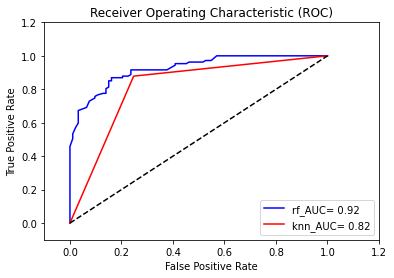

In [68]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(rf_fpr,rf_tpr,'b',
         label='rf_AUC= %0.2f'%rf_roc_auc)
plt.plot(knn_fpr,knn_tpr,'r',
         label='knn_AUC= %0.2f'%knn_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()



In [69]:
# The Roc curve dispalyed that the randomforest model has the highest accuracy which is 0.92. This is a very good model as 
# accuracy score is above 0.92, but should be careful to false positive cases as it still occurs using this model.

In [118]:
# From above models RandomForest models perform best so I am going to deploy this model.